# scipy.stats 는 기본적인  T-test 와 교차검정, 정규성검정, 등분산성 검정, 일원배치 분산분석 등 간단한 분석만 가능함
# statemodel 은 사후 검정과 상호작용효과, 선형회귀, 시계열 등 전문적인 통계분석 도구임

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.stats as stats
import pandas as pd
iris_data = pd.read_csv('/content/drive/MyDrive/datasets/iris.csv')

In [3]:
iris_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,target
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris_data.drop(columns = 'Unnamed: 0')

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris_data.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [7]:
target_list = iris_data['target'].unique()
setosa = iris_data[iris_data['target'] == target_list[0]]['sepal width'] # --->setosa = iris_data[iris_data['target'] == 'setosa']['sepal width']
versicolor = iris_data[iris_data['target'] == target_list[1]]['sepal width']  # ---> versicolor = iris_data[iris_data['target']== 'versicolor']['sepal width]
virginica = iris_data[iris_data['target'] ==target_list[2]]['sepal width']  # ---> virginica = [iris_data['target']=='virginica']['sepal width]
print(target_list)# np.where(iris_data['target']=='setosa', 1, 0)으로 하면 한 열에 1, 0 으로 변환되어 새로운 배열이 생성되기 때문에 t-test나 anova 분석을할 수  없음 따라서 세집단으로 분리하여 검정해야됨

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


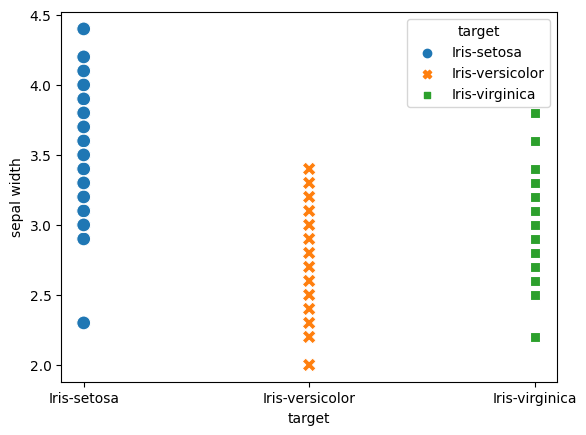

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x = 'target', y = 'sepal width', hue = 'target', style = 'target', s = 100, data = iris_data)
plt.show()

#정규성 검정

In [9]:
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))
# ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)
# ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
# ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)
# p 값이 유의하지 않으므로 귀무가설( 분포는 정규분포다)를 채택함

ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)
ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089871108531952)


In [10]:
stats.levene(setosa, versicolor, virginica)
#LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)
#유의 수준보다 크므로 귀무가설(분산은 동일하다) 채택함

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [11]:
dir(stats)

['BootstrapMethod',
 'CensoredData',
 'ConstantInputWarning',
 'Covariance',
 'DegenerateDataWarning',
 'FitError',
 'MonteCarloMethod',
 'NearConstantInputWarning',
 'PermutationMethod',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_censored_data',
 '_common',
 '_constants',
 '_continuous_distns',
 '_covariance',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multicomp',
 '_multivariate',
 '_mvn',
 '_odds_ratio',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_qmvnt',
 '_rcont',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sensitivity_analysis',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_s

In [12]:
stats.f_oneway(setosa, versicolor, virginica) #일원배치 분산분석 f_oneway
#F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)
# p 값이 0.05 보다 작으므로 집단간 평균의 차이가 있다. 연구가설 채택됨

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

#사후 검정 MultiComparison(data = 종속변수(연속형), groups = 독립변수(범주형)) 다중 비교 객체를 생성
#tuekeyhsd = mc.tukeyhsd(alpha = 0.05)

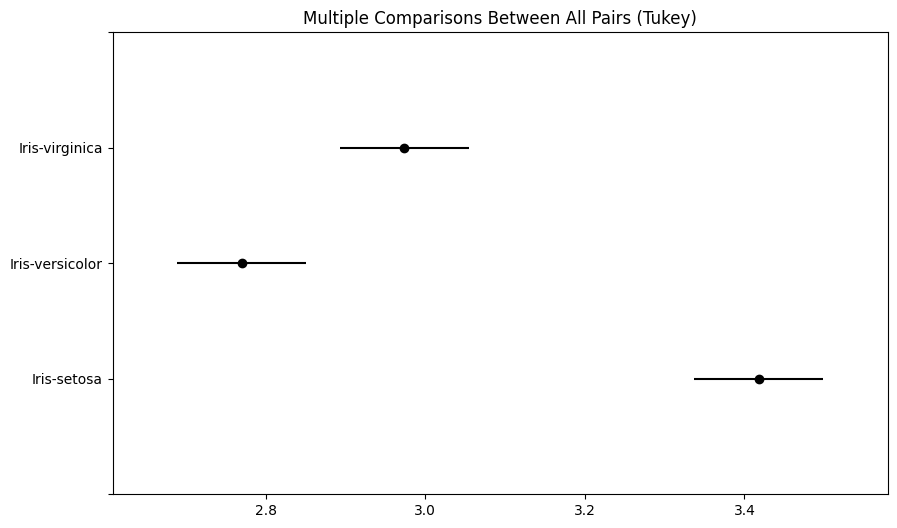

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
# MultiComparison(data = 종속변수(연속형), groups = 독립변수(범주형)) 독립변수는 범주형 자료가 들어가야됨 예: 집단 1, 2, 3 ,  종속변수는 연속형 변수
mc =  MultiComparison(data = iris_data['sepal width'], groups = iris_data['target']) #다중 비교 객체를 생성하고 각 그룹 간 평균 차이의 비교를 수행할 준비 단계
tuekeyhsd = mc.tukeyhsd(alpha = 0.05) #alpha=0.05는 통계적 유의성의 기준을 5% 수준으로 설정. 이 함수는 각 그룹 쌍 간의 평균 차이, 그 차이의 통계적 유의성, 신뢰구간 등을 계산
fig = tuekeyhsd.plot_simultaneous() #이 플롯은 각 그룹 간의 평균 차이와 관련된 신뢰 구간을 보여주어, 어떤 그룹 쌍이 통계적으로 유의미한 차이를 보이는지 한눈에 파악할 수 있게 해줌

In [14]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [15]:
import pandas as pd
mtcars = pd.read_csv('/content/drive/MyDrive/datasets/mtcars.csv')
mtcars.head()

,Unnamed: 0.1,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [16]:
mtcars.drop('Unnamed: 0.1', inplace = True,  axis = 1)

In [17]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [18]:
mtcars = mtcars[['mpg','am','cyl']]
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [19]:
from statsmodels.formula.api import ols
help(ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model.
    data : array_like
        The data for the model. See Notes.
    subset : array_like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`.
    drop_cols : array_like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    *args
        Additional positional argument that are passed to the model.
    **kwargs
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironm

#statsmodels.stats 모듈은 다양한 통계적 검정과 유틸리티 함수를 제공
#statsmodels.formula.api는 patsy라는 라이브러리의 수식 문법을 사용하여 통계 모델을 정의할 수 있으며 이 모듈을 사용하면 R 스타일의 수식 문법을 사용하여 통계 모델을 쉽게 정의할 수 있습음. 예를 들어, "y ~ x1 + x2"와 같은 식으로 종속 변수와 독립 변수 간의 관계를 정의할 수 있음

In [20]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'mpg ~ C(cyl) +  C(am) + C(cyl):C(am)' #  mpg는 종속 변수이며, cyl (실린더 수), am (변속기 유형)은 독립 변수. C() 함수는 범주형 변수임을 나타냄. C(cyl):C(am)는 cyl과 am의 상호작용 효과
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ = 2)
aov_table # C(cyl)는 통계적으로 유의 하며 종속변수에 영향을 미치며  C(am), C(cyl):C(am)는 유의하지 않으며 영향이 있다 할 수 없음

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


#일반적으로 그래프가 교차하거나 기울기가 현저히 차이가 있으면 상호작용이 존재한다 할 수 있음

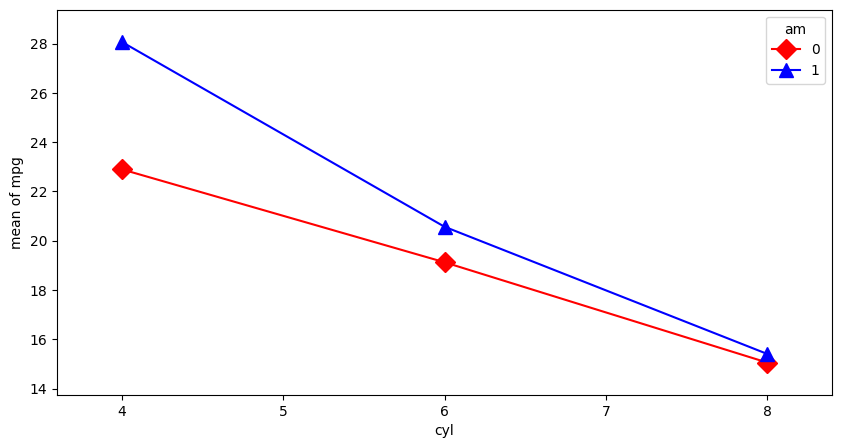

In [21]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

cyl = mtcars['cyl']
am = mtcars['am']
mpg = mtcars['mpg']
fig, ax = plt.subplots(figsize = (10, 5))
fig = interaction_plot(cyl, am, mpg, colors = ['red','blue'], markers = ['D', '^'], ms = 10, ax = ax)